In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/water-pollution-and-disease/water_pollution_disease.csv


In [2]:
import matplotlib.pyplot as plt

# Loading and understanding the basic structure of the data

In [3]:
# Load the dataset
data_path = '/kaggle/input/water-pollution-and-disease/water_pollution_disease.csv'
df = pd.read_csv(data_path, encoding='utf-8')

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # No width limit
pd.set_option('display.max_colwidth', None) # Show full column content


# Display the first few rows of the dataset
print('First few rows of the dataset:')
display(df.head())

# Check dataset info
print('\nDataset info:')
df.info()

# Check for missing values
print('\nMissing values in each column:')
display(df.isnull().sum())

# check for duplicate rows
print('\n Duplicate rows')
display(df.duplicated().sum())


First few rows of the dataset:


,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),Bacteria Count (CFU/mL),Water Treatment Method,Access to Clean Water (% of Population),"Diarrheal Cases per 100,000 people","Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
0,Mexico,North,2015,Lake,6.06,7.12,3.93,4.28,8.28,7.89,3344,Filtration,33.60,472,33,44,76.16,57057,96.92,84.61,63.23,2800,4.94,593
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,2122,Boiling,89.54,122,27,8,77.30,17220,84.73,73.37,29.12,1572,16.93,234
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,2330,NaN,35.29,274,39,50,48.45,86022,58.37,72.86,93.56,2074,21.73,57
3,Nigeria,East,2016,Well,7.91,6.71,1.96,3.12,36.92,6.77,3779,Boiling,57.53,3,33,13,95.66,31166,39.07,71.07,94.25,937,3.79,555
4,Mexico,South,2005,Well,0.12,8.16,4.22,9.15,49.35,12.51,4182,Filtration,36.60,466,31,68,58.78,25661,23.03,55.55,69.23,2295,31.44,414



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        3000 non-null   object 
 1   Region                                         3000 non-null   object 
 2   Year                                           3000 non-null   int64  
 3   Water Source Type                              3000 non-null   object 
 4   Contaminant Level (ppm)                        3000 non-null   float64
 5   pH Level                                       3000 non-null   float64
 6   Turbidity (NTU)                                3000 non-null   float64
 7   Dissolved Oxygen (mg/L)                        3000 non-null   float64
 8   Nitrate Level (mg/L)                           3000 non-null   float64
 9   Lead Concentration (µg/L)            

Country                                            0
Region                                             0
Year                                               0
Water Source Type                                  0
Contaminant Level (ppm)                            0
pH Level                                           0
Turbidity (NTU)                                    0
Dissolved Oxygen (mg/L)                            0
Nitrate Level (mg/L)                               0
Lead Concentration (µg/L)                          0
Bacteria Count (CFU/mL)                            0
Water Treatment Method                           747
Access to Clean Water (% of Population)            0
Diarrheal Cases per 100,000 people                 0
Cholera Cases per 100,000 people                   0
Typhoid Cases per 100,000 people                   0
Infant Mortality Rate (per 1,000 live births)      0
GDP per Capita (USD)                               0
Healthcare Access Index (0-100)               


 Duplicate rows


0

In [33]:
# Gaining insights over the numerical columns of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,3000.0,2012.012667,7.229287,2000.00,2006.0000,2012.000,2018.0000,2024.00
Contaminant Level (ppm),3000.0,4.954390,2.860072,0.00,2.5600,4.950,7.4000,10.00
pH Level,3000.0,7.255847,0.720464,6.00,6.6300,7.280,7.8700,8.50
Turbidity (NTU),3000.0,2.480023,1.419984,0.00,1.2575,2.460,3.6600,4.99
Dissolved Oxygen (mg/L),3000.0,6.492850,2.027966,3.00,4.7100,6.490,8.2525,10.00
Nitrate Level (mg/L),3000.0,25.080250,14.505170,0.05,12.5250,24.790,37.9100,49.99
Lead Concentration (µg/L),3000.0,10.047913,5.798238,0.00,5.1200,10.065,15.0325,20.00
Bacteria Count (CFU/mL),3000.0,2488.477333,1431.421553,0.00,1268.0000,2469.000,3736.2500,4998.00
Access to Clean Water (% of Population),3000.0,64.612333,20.308463,30.01,47.0275,64.780,82.3025,99.99
"Diarrheal Cases per 100,000 people",3000.0,249.776667,144.111543,0.00,124.0000,248.000,378.0000,499.00


In [10]:
# As we can see there are 747 rows with missing water treatment values.

#analysing a row
df.loc[0]

Country                                              Mexico
Region                                                North
Year                                                   2015
Water Source Type                                      Lake
Contaminant Level (ppm)                                6.06
pH Level                                               7.12
Turbidity (NTU)                                        3.93
Dissolved Oxygen (mg/L)                                4.28
Nitrate Level (mg/L)                                   8.28
Lead Concentration (µg/L)                              7.89
Bacteria Count (CFU/mL)                                3344
Water Treatment Method                           Filtration
Access to Clean Water (% of Population)                33.6
Diarrheal Cases per 100,000 people                      472
Cholera Cases per 100,000 people                         33
Typhoid Cases per 100,000 people                         44
Infant Mortality Rate (per 1,000 live bi

In [11]:
# Let's dive deeper into missing values of water treatment methods

missing_data = df.loc[df['Water Treatment Method'].isnull()]

missing_data.sample(5)

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),Bacteria Count (CFU/mL),Water Treatment Method,Access to Clean Water (% of Population),"Diarrheal Cases per 100,000 people","Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
1487,Pakistan,Central,2001,Well,5.42,6.97,3.55,6.22,24.25,3.54,4844,NaN,93.02,123,8,87,99.28,75812,45.85,11.67,65.92,1774,31.03,57
1467,Nigeria,Central,2018,Pond,2.58,7.18,1.97,4.29,14.33,4.35,612,NaN,64.71,263,6,71,91.93,20341,81.07,80.13,66.17,2181,8.80,22
943,Indonesia,South,2021,Pond,6.88,7.41,0.56,5.26,21.24,5.98,1076,NaN,65.16,465,40,48,12.32,72733,35.11,19.93,33.14,2231,26.48,744
2700,Mexico,North,2012,Pond,9.81,7.84,3.61,5.19,20.95,1.53,2845,NaN,68.05,338,46,33,5.78,57772,98.11,43.98,65.86,699,1.34,392
1246,Brazil,South,2018,Lake,3.86,6.71,1.28,8.40,46.03,16.58,1438,NaN,50.40,124,40,94,57.61,5884,93.08,72.15,66.47,656,12.45,761


Country
Bangladesh    291
Brazil        291
China         311
Ethiopia      293
India         290
Indonesia     304
Mexico        288
Nigeria       315
Pakistan      298
USA           319
dtype: int64

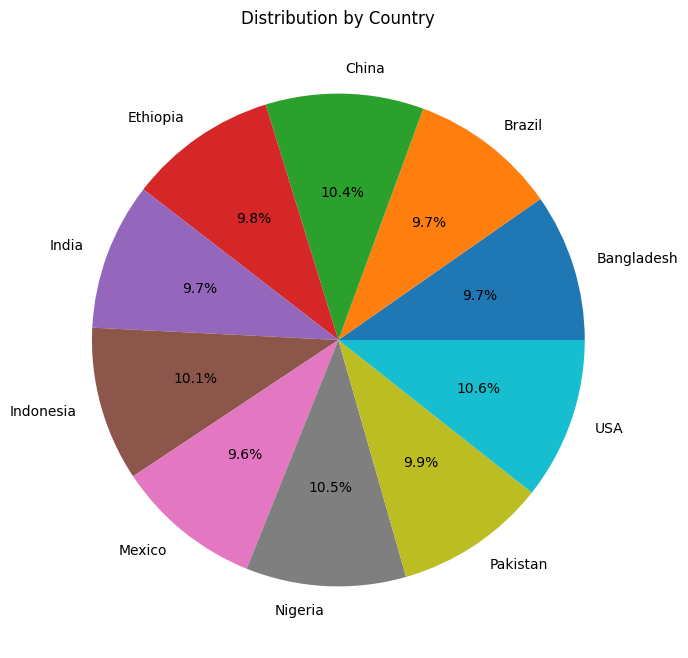

Country
Bangladesh    62
Brazil        75
China         73
Ethiopia      65
India         63
Indonesia     82
Mexico        72
Nigeria       89
Pakistan      79
USA           87
dtype: int64

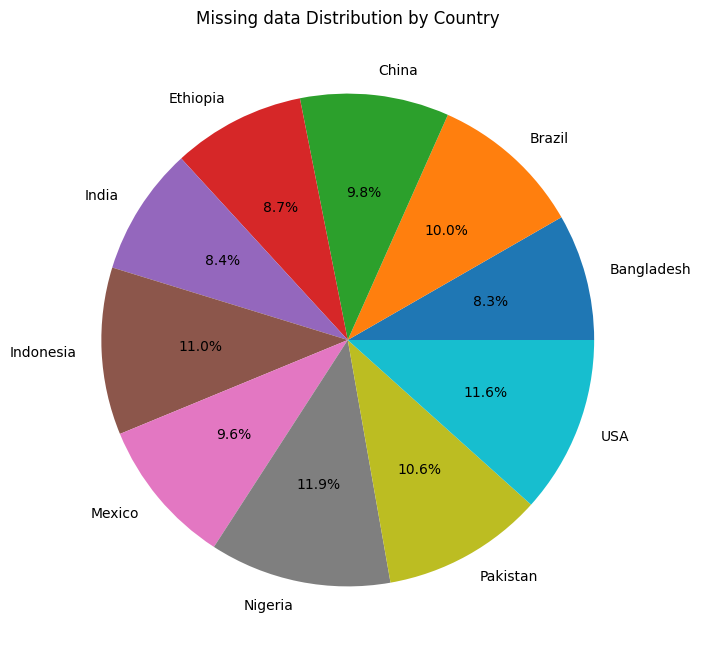

Year
2000    115
2001    131
2002    114
2003    111
2004    125
2005    122
2006    142
2007    106
2008    101
2009    134
2010    113
2011    138
2012    119
2013    112
2014    102
2015    126
2016    126
2017    134
2018    107
2019    114
2020    117
2021    119
2022    127
2023    121
2024    124
dtype: int64

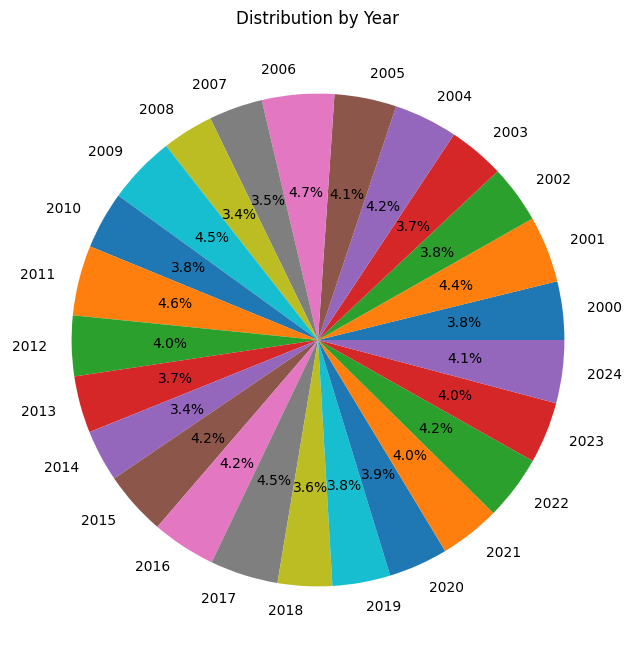

Year
2000    25
2001    35
2002    20
2003    30
2004    26
2005    31
2006    36
2007    26
2008    29
2009    35
2010    28
2011    28
2012    31
2013    26
2014    25
2015    33
2016    25
2017    41
2018    31
2019    28
2020    32
2021    32
2022    31
2023    29
2024    34
dtype: int64

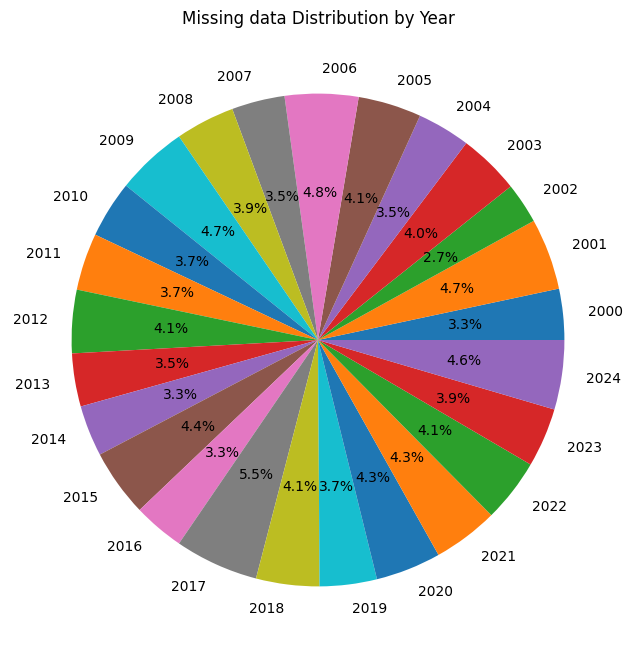

Water Source Type
Lake      481
Pond      450
River     538
Spring    532
Tap       501
Well      498
dtype: int64

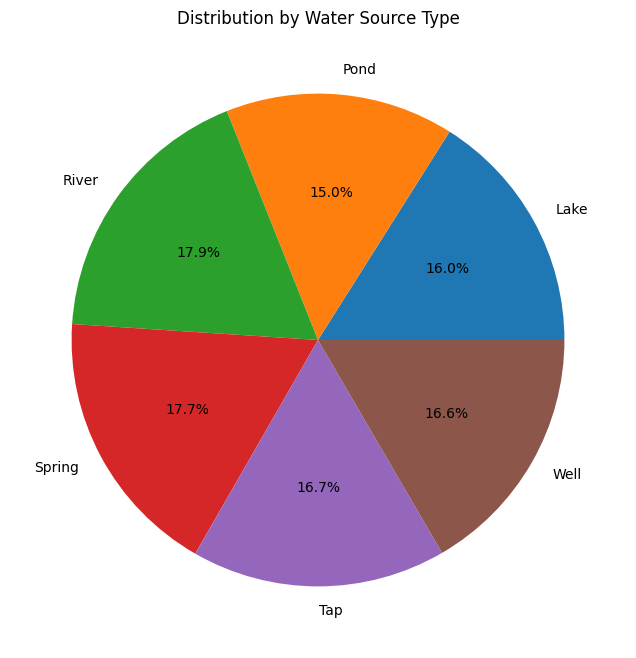

Water Source Type
Lake      121
Pond      109
River     135
Spring    132
Tap       121
Well      129
dtype: int64

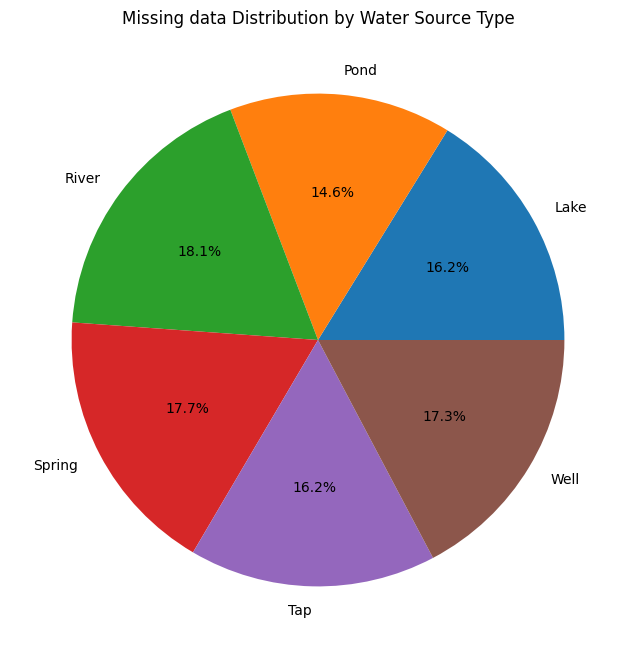

Water Treatment Method
Boiling         777
Chlorination    748
Filtration      728
dtype: int64

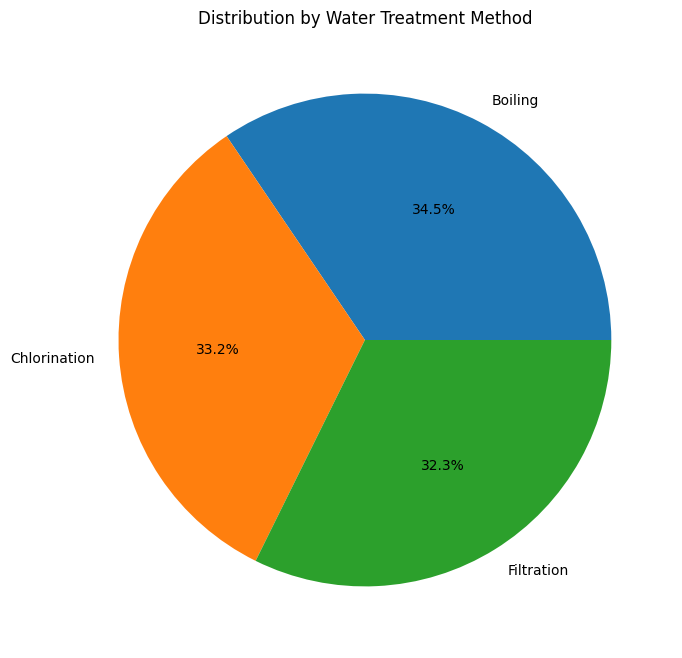

Series([], dtype: int64)

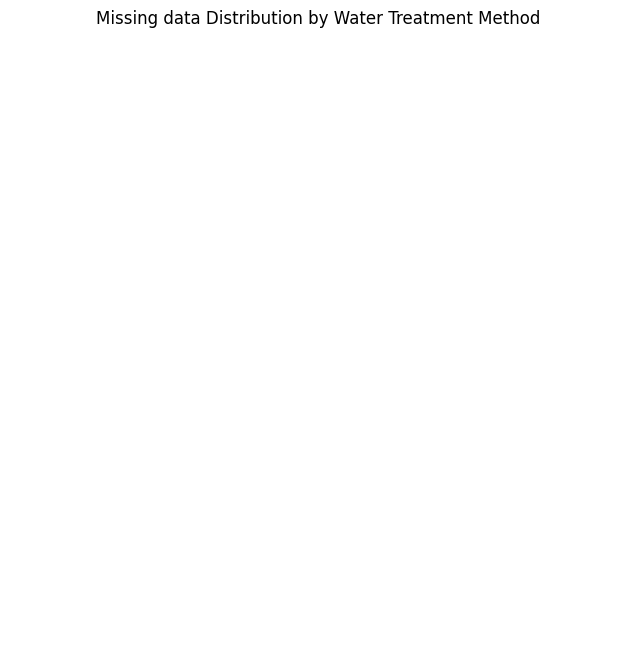

In [12]:
# Let's see the representation of the data by country vs missing data by country
l = ['Country', 'Year', 'Water Source Type', 'Water Treatment Method']

for column in l:
    country_grouped = df.groupby(f'{column}').size()
    
    display(country_grouped)
    
    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(country_grouped, labels=country_grouped.index, autopct='%1.1f%%')
    plt.title(f'Distribution by {column}')
    plt.show()
    
    
    missing_country_grouped = missing_data.groupby(column).size()
    
    display(missing_country_grouped)
    
    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(missing_country_grouped, labels=missing_country_grouped.index, autopct='%1.1f%%')
    plt.title(f'Missing data Distribution by {column}')
    plt.show()


Indian Data


Region
Central    56
East       65
North      48
South      69
West       52
dtype: int64

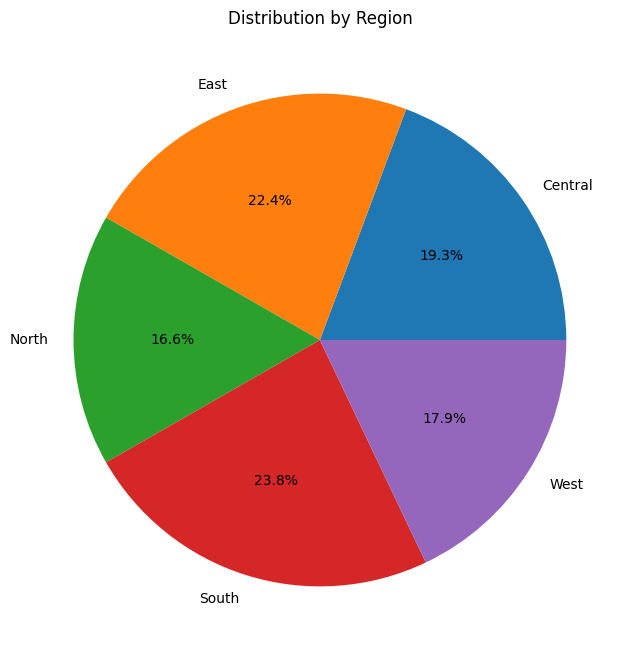

Region
Central     8
East       15
North      17
South      14
West        9
dtype: int64

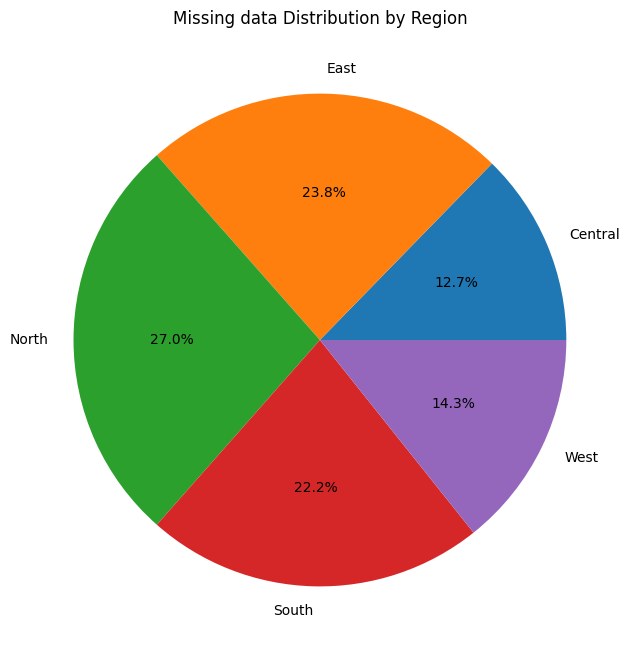

Year
2000    10
2001    17
2002    13
2003    11
2004    16
2005    13
2006    13
2007    10
2008    10
2009    16
2010    13
2011     9
2012     7
2013    16
2014     9
2015    11
2016    11
2017    14
2018    12
2019    11
2020     8
2021    11
2022    13
2023    11
2024     5
dtype: int64

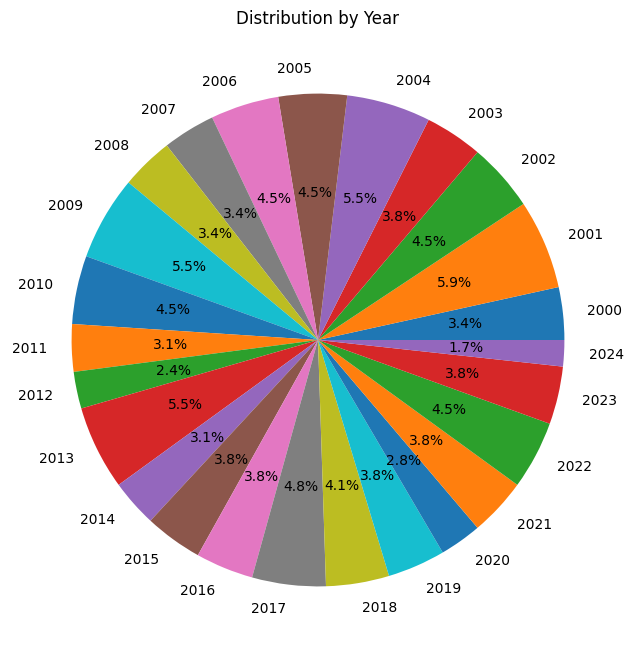

Year
2000    1
2001    5
2002    3
2003    2
2004    2
2005    1
2006    1
2007    2
2008    4
2009    3
2010    5
2011    3
2012    1
2013    2
2014    2
2015    3
2016    2
2017    5
2018    3
2019    3
2020    1
2021    3
2022    2
2023    1
2024    3
dtype: int64

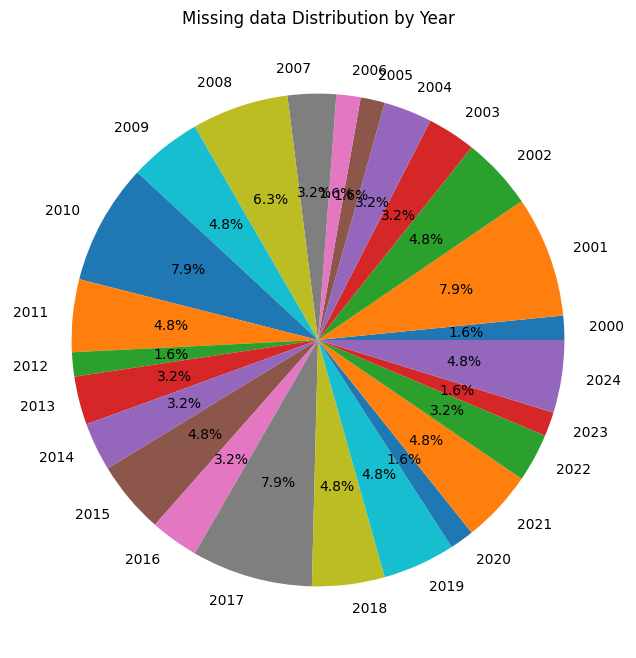

Water Source Type
Lake      45
Pond      51
River     51
Spring    48
Tap       42
Well      53
dtype: int64

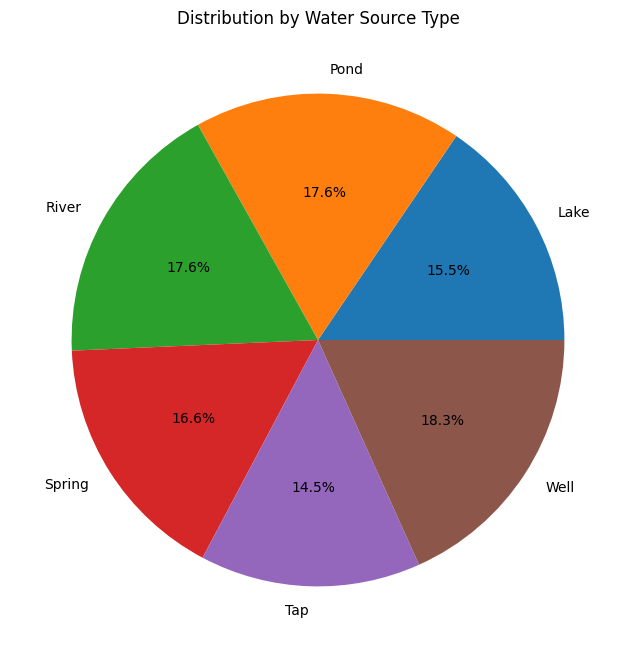

Water Source Type
Lake       9
Pond      15
River     10
Spring    14
Tap        6
Well       9
dtype: int64

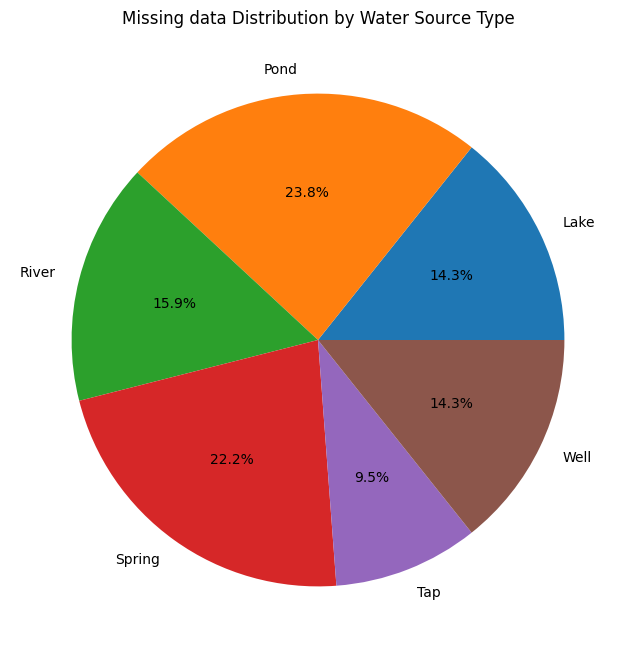

Water Treatment Method
Boiling         70
Chlorination    75
Filtration      82
dtype: int64

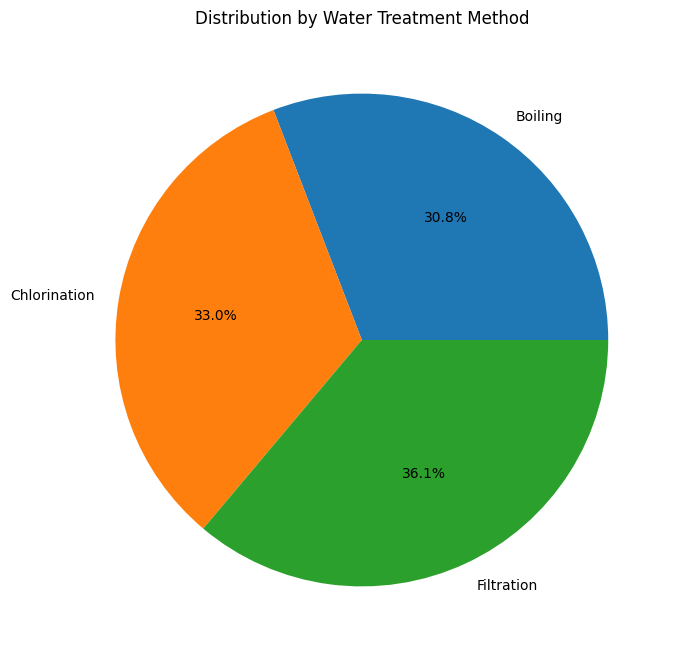

Series([], dtype: int64)

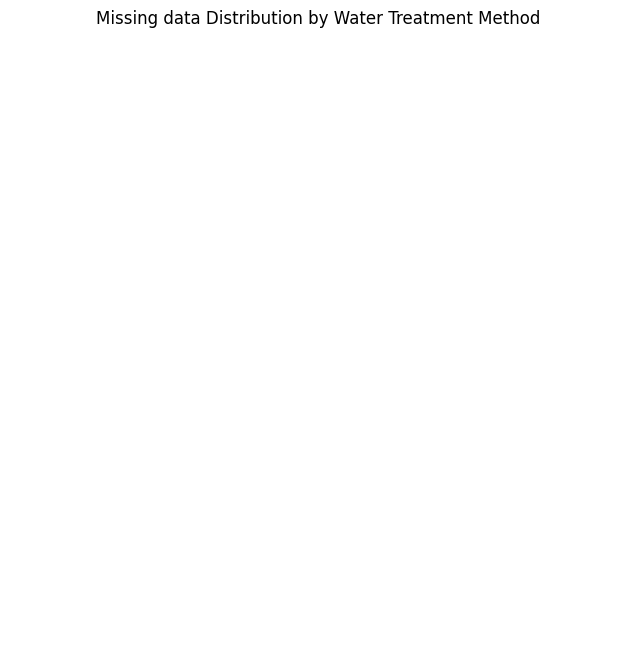

In [13]:
# Let's see the representation of the indian data vs missing data by country
l = ['Region', 'Year', 'Water Source Type', 'Water Treatment Method']

print ('Indian Data')
indian_data = df.loc[df['Country'] == 'India']

indian_missing_data = missing_data.loc[missing_data['Country'] == 'India']
for column in l:
    
    country_grouped = indian_data.groupby(f'{column}').size()
    
    display(country_grouped)
    
    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(country_grouped, labels=country_grouped.index, autopct='%1.1f%%')
    plt.title(f'Distribution by {column}')
    plt.show()
    
    
    missing_indian_grouped = indian_missing_data.groupby(column).size()
    
    display(missing_indian_grouped)
    
    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(missing_indian_grouped, labels=missing_indian_grouped.index, autopct='%1.1f%%')
    plt.title(f'Missing data Distribution by {column}')
    plt.show()


In [31]:

    income_bins = [0, 1085, 4255, 13205, 50000, np.inf]
    income_labels = ['Low Income', 'Lower Middle Income', 'Middle Income', 'Upper Middle Income', 'High Income']
    temp = df
    temp['Income_Group'] = pd.cut(temp['GDP per Capita (USD)'], bins=income_bins, labels=income_labels)
    
    # Comprehensive statistics by income group
    income_stats = temp.groupby('Income_Group').agg({
        'Income_Group' : 'count',
        'pH Level' : ['mean', 'median', 'std', 'count'],
        'Turbidity (NTU)': ['mean', 'median', 'std', 'count'],
        'Dissolved Oxygen (mg/L)': ['mean', 'median', 'std', 'count'],
        'Nitrate Level (mg/L)': ['mean', 'median', 'std', 'count'],
        'Bacteria Count (CFU/mL)': ['mean', 'median', 'std', 'count'],
        'Access to Clean Water (% of Population)': ['mean', 'median', 'std', 'count'],
        'Diarrheal Cases per 100,000 people': ['mean', 'median', 'std', 'count'],
        'Cholera Cases per 100,000 people': ['mean', 'median', 'std', 'count'],
        'Typhoid Cases per 100,000 people': ['mean', 'median', 'std', 'count'],
        'Infant Mortality Rate (per 1,000 live births)': ['mean', 'median', 'std', 'count'],
        'Healthcare Access Index (0-100)': ['mean', 'median', 'std', 'count'],
        'Sanitation Coverage (% of Population)': ['mean', 'median', 'std', 'count'],
        'Population Density (people per km²)': ['mean', 'median', 'std', 'count'],
        'Population Density (people per km²)': ['mean', 'median', 'std', 'count'],
        'Temperature (°C)': ['mean', 'median', 'std', 'count'],
        'GDP per Capita (USD)': 'mean'
    }).round(2)
    
    print("World Bank Income Group Analysis:")
    
    # First, identify all numerical columns
    numerical_columns = income_stats.select_dtypes(include=['number']).columns
    
    
    display(income_stats.transpose())


World Bank Income Group Analysis:


/tmp/ipykernel_36/1113216660.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_stats = temp.groupby('Income_Group').agg({


Income_Group                                          Low Income  \
Income_Group                                  count        11.00   
pH Level                                      mean          7.26   
                                              median        7.55   
                                              std           0.77   
                                              count        11.00   
Turbidity (NTU)                               mean          2.19   
                                              median        2.45   
                                              std           0.96   
                                              count        11.00   
Dissolved Oxygen (mg/L)                       mean          7.67   
                                              median        7.60   
                                              std           1.92   
                                              count        11.00   
Nitrate Level (mg/L)                          mean         28.71   
                                              median       32.45   
                                              std          13.48   
                                              count        11.00   
Bacteria Count (CFU/mL)                       mean       2098.09   
                                              median     1639.00   
                                              std        1742.31   
                                              count        11.00   
Access to Clean Water (% of Population)       mean         59.94   
                                              median       60.31   
                                              std          13.85   
                                              count        11.00   
Diarrheal Cases per 100,000 people            mean        244.00   
                                              median      248.00   
                                              std         138.92   
                                              count        11.00   
Cholera Cases per 100,000 people              mean         32.36   
                                              median       32.00   
                                              std          17.03   
                                              count        11.00   
Typhoid Cases per 100,000 people              mean         57.55   
                                              median       61.00   
                                              std          28.82   
                                              count        11.00   
Infant Mortality Rate (per 1,000 live births) mean         52.50   
                                              median       43.76   
                                              std          25.84   
                                              count        11.00   
Healthcare Access Index (0-100)               mean         61.60   
                                              median       55.42   
                                              std          28.63   
                                              count        11.00   
Sanitation Coverage (% of Population)         mean         62.75   
                                              median       70.18   
                                              std          19.62   
                                              count        11.00   
Population Density (people per km²)           mean        564.64   
                                              median      499.00   
                                              std         237.90   
                                              count        11.00   
Temperature (°C)                              mean         23.07   
                                              median       24.26   
                                              std          10.78   
                                              count        11.00   
GDP per Capita (USD)                          mean      

In [28]:
# Get the list of countries in each income group
countries_by_income = temp.groupby('Income_Group')['Country'].unique()
print("Countries in Each Income Basket:")

for income_group, countries in countries_by_income.items():
    print(f"\n{income_group} ({len(countries)} countries):")
    print(", ".join(countries))

Countries in Each Income Basket:

Low Income (6 countries):
USA, Ethiopia, Brazil, India, Indonesia, China

Lower Middle Income (10 countries):
India, Ethiopia, Brazil, USA, Mexico, Pakistan, Bangladesh, Nigeria, China, Indonesia

Middle Income (10 countries):
China, Indonesia, Nigeria, India, USA, Pakistan, Bangladesh, Ethiopia, Brazil, Mexico

Upper Middle Income (10 countries):
Brazil, Nigeria, Mexico, Indonesia, Bangladesh, USA, China, India, Pakistan, Ethiopia

High Income (10 countries):
Mexico, Indonesia, Ethiopia, Nigeria, Brazil, China, Bangladesh, India, Pakistan, USA


/tmp/ipykernel_36/1252708190.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  countries_by_income = temp.groupby('Income_Group')['Country'].unique()


In [34]:
# Get count of each country in each income group
country_income_counts = temp.groupby(['Country', 'Income_Group']).size().unstack(fill_value=0)
print("Count of Each Country in Each Income Group:")
display(country_income_counts)

Count of Each Country in Each Income Group:


/tmp/ipykernel_36/1474516989.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_income_counts = temp.groupby(['Country', 'Income_Group']).size().unstack(fill_value=0)


Income_Group,Low Income,Lower Middle Income,Middle Income,Upper Middle Income,High Income
Country,,,,,
Bangladesh,0,10,31,101,149
Brazil,3,8,25,110,145
China,1,6,31,118,155
Ethiopia,1,6,20,114,152
India,2,12,30,109,137
Indonesia,1,7,21,117,158
Mexico,0,11,25,115,137
Nigeria,0,11,24,130,150
Pakistan,0,6,27,115,150


In [32]:
# Comparing numerical data across the countries and world

print ("\n Entire data")
display(df.describe().transpose())

print("\n Missing data")
display(missing_data.describe().transpose())

print("\n Missing Indian data")
display(indian_missing_data.describe().transpose())




 Entire data


,count,mean,std,min,25%,50%,75%,max
Year,3000.0,2012.012667,7.229287,2000.00,2006.0000,2012.000,2018.0000,2024.00
Contaminant Level (ppm),3000.0,4.954390,2.860072,0.00,2.5600,4.950,7.4000,10.00
pH Level,3000.0,7.255847,0.720464,6.00,6.6300,7.280,7.8700,8.50
Turbidity (NTU),3000.0,2.480023,1.419984,0.00,1.2575,2.460,3.6600,4.99
Dissolved Oxygen (mg/L),3000.0,6.492850,2.027966,3.00,4.7100,6.490,8.2525,10.00
Nitrate Level (mg/L),3000.0,25.080250,14.505170,0.05,12.5250,24.790,37.9100,49.99
Lead Concentration (µg/L),3000.0,10.047913,5.798238,0.00,5.1200,10.065,15.0325,20.00
Bacteria Count (CFU/mL),3000.0,2488.477333,1431.421553,0.00,1268.0000,2469.000,3736.2500,4998.00
Access to Clean Water (% of Population),3000.0,64.612333,20.308463,30.01,47.0275,64.780,82.3025,99.99
"Diarrheal Cases per 100,000 people",3000.0,249.776667,144.111543,0.00,124.0000,248.000,378.0000,499.00



 Missing data


,count,mean,std,min,25%,50%,75%,max
Year,747.0,2012.283802,7.205694,2000.00,2006.000,2012.00,2018.000,2024.00
Contaminant Level (ppm),747.0,4.904712,2.889577,0.02,2.530,4.70,7.340,9.99
pH Level,747.0,7.261821,0.723360,6.00,6.625,7.29,7.890,8.49
Turbidity (NTU),747.0,2.533146,1.445950,0.01,1.280,2.52,3.745,4.99
Dissolved Oxygen (mg/L),747.0,6.465850,2.015313,3.01,4.790,6.39,8.260,10.00
Nitrate Level (mg/L),747.0,25.162155,14.331754,0.05,13.225,24.31,38.065,49.91
Lead Concentration (µg/L),747.0,10.137564,5.902063,0.03,5.430,10.03,15.430,19.98
Bacteria Count (CFU/mL),747.0,2531.224900,1452.957731,11.00,1265.500,2488.00,3805.500,4996.00
Access to Clean Water (% of Population),747.0,65.102972,20.298269,30.01,47.000,65.88,83.430,99.94
"Diarrheal Cases per 100,000 people",747.0,250.405622,142.507025,0.00,129.000,250.00,377.000,499.00



 Missing Indian data


,count,mean,std,min,25%,50%,75%,max
Year,63.0,2011.952381,7.067482,2000.00,2007.000,2011.00,2017.500,2024.00
Contaminant Level (ppm),63.0,5.216508,3.026676,0.02,2.540,5.55,7.485,9.97
pH Level,63.0,7.429206,0.643802,6.17,6.885,7.43,7.995,8.47
Turbidity (NTU),63.0,2.575873,1.469338,0.20,1.145,2.62,3.805,4.95
Dissolved Oxygen (mg/L),63.0,6.160952,2.005154,3.01,4.560,5.74,8.055,9.94
Nitrate Level (mg/L),63.0,24.811429,14.446475,0.27,12.595,23.30,37.790,49.00
Lead Concentration (µg/L),63.0,10.682540,5.818143,0.04,5.980,10.96,15.860,19.75
Bacteria Count (CFU/mL),63.0,2532.888889,1339.512696,26.00,1468.500,2529.00,3657.000,4905.00
Access to Clean Water (% of Population),63.0,67.505397,18.925434,30.88,51.760,69.60,83.925,96.69
"Diarrheal Cases per 100,000 people",63.0,249.079365,131.991850,6.00,128.000,258.00,368.000,484.00


In [21]:
# First, identify all numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Loop through each numerical column and print its summary
for col in numerical_columns:
    print(f"\n=== {col} Statistics by Country ===")
    result = df.groupby('Country')[col].describe()
    display(result)
    print("-" * 50)


=== Year Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,2012.302405,7.163939,2000.0,2006.00,2012.0,2019.0,2024.0
Brazil,291.0,2013.034364,6.992029,2000.0,2007.50,2013.0,2019.0,2024.0
China,311.0,2011.607717,7.304029,2000.0,2006.00,2011.0,2018.0,2024.0
Ethiopia,293.0,2012.047782,7.358559,2000.0,2006.00,2012.0,2019.0,2024.0
India,290.0,2011.303448,7.130348,2000.0,2005.00,2011.0,2017.0,2024.0
Indonesia,304.0,2011.332237,7.246131,2000.0,2005.00,2011.0,2018.0,2024.0
Mexico,288.0,2011.788194,7.260720,2000.0,2005.75,2012.0,2017.0,2024.0
Nigeria,315.0,2012.600000,7.011274,2000.0,2006.00,2013.0,2018.0,2024.0
Pakistan,298.0,2012.114094,7.295615,2000.0,2006.00,2012.0,2018.0,2024.0


--------------------------------------------------

=== Contaminant Level (ppm) Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,5.178488,2.772924,0.01,2.9450,5.420,7.2200,9.98
Brazil,291.0,4.681375,2.852474,0.02,2.4500,4.470,7.3200,9.95
China,311.0,4.966045,2.715052,0.03,2.7900,5.060,7.1700,9.97
Ethiopia,293.0,4.977918,2.750605,0.04,2.6700,4.950,7.1800,9.96
India,290.0,5.141966,2.880545,0.01,2.7825,5.335,7.4875,9.99
Indonesia,304.0,4.649211,2.886655,0.15,2.0475,4.620,7.0200,9.99
Mexico,288.0,5.169132,2.983828,0.01,2.6925,4.895,8.0350,9.94
Nigeria,315.0,5.138159,2.894352,0.09,2.6550,5.130,7.8050,10.00
Pakistan,298.0,4.653826,2.896552,0.03,2.1700,4.510,7.1175,9.98


--------------------------------------------------

=== pH Level Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,7.289141,0.714575,6.00,6.6750,7.390,7.8150,8.48
Brazil,291.0,7.239244,0.755079,6.00,6.6000,7.230,7.8950,8.50
China,311.0,7.243376,0.687488,6.01,6.6500,7.280,7.8350,8.48
Ethiopia,293.0,7.254164,0.730327,6.01,6.6500,7.210,7.9000,8.50
India,290.0,7.246241,0.734758,6.00,6.5825,7.245,7.8875,8.50
Indonesia,304.0,7.271612,0.720096,6.03,6.6675,7.270,7.9075,8.49
Mexico,288.0,7.287813,0.719305,6.04,6.6825,7.305,7.8900,8.49
Nigeria,315.0,7.245905,0.741150,6.00,6.5650,7.260,7.9050,8.50
Pakistan,298.0,7.225302,0.700638,6.03,6.6300,7.205,7.8075,8.47


--------------------------------------------------

=== Turbidity (NTU) Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,2.536873,1.451688,0.02,1.2900,2.630,3.8350,4.95
Brazil,291.0,2.535361,1.391886,0.05,1.4150,2.530,3.6200,4.99
China,311.0,2.430932,1.418465,0.06,1.2450,2.270,3.6950,4.98
Ethiopia,293.0,2.443140,1.442546,0.01,1.2300,2.340,3.5500,4.98
India,290.0,2.416793,1.391716,0.05,1.1625,2.445,3.5750,4.99
Indonesia,304.0,2.439605,1.394254,0.01,1.1200,2.450,3.5000,4.95
Mexico,288.0,2.486528,1.412121,0.01,1.2450,2.450,3.6025,4.98
Nigeria,315.0,2.405111,1.451160,0.02,1.1850,2.330,3.5900,4.99
Pakistan,298.0,2.595403,1.484218,0.01,1.3250,2.690,3.8250,4.99


--------------------------------------------------

=== Dissolved Oxygen (mg/L) Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,6.529588,1.969404,3.08,4.945,6.280,8.2200,9.98
Brazil,291.0,6.482405,2.040628,3.00,4.670,6.530,8.3450,9.95
China,311.0,6.636817,2.030006,3.02,4.930,6.720,8.4300,9.99
Ethiopia,293.0,6.491092,2.013100,3.01,4.760,6.510,8.2900,10.00
India,290.0,6.471172,2.054821,3.00,4.715,6.455,8.1800,9.99
Indonesia,304.0,6.584441,2.068256,3.01,4.825,6.700,8.3175,10.00
Mexico,288.0,6.422951,1.974842,3.02,4.775,6.375,8.0275,10.00
Nigeria,315.0,6.212159,2.052336,3.02,4.365,6.120,7.8750,9.99
Pakistan,298.0,6.442752,2.005328,3.02,4.670,6.270,8.2675,9.98


--------------------------------------------------

=== Nitrate Level (mg/L) Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,26.207766,14.832270,0.10,12.285,28.220,39.5550,49.62
Brazil,291.0,24.806426,14.806325,0.24,11.925,24.580,38.0250,49.91
China,311.0,24.942669,14.503255,0.49,12.360,24.200,38.5250,49.76
Ethiopia,293.0,23.912696,15.046605,0.16,10.570,23.410,37.3800,49.95
India,290.0,25.417345,14.359217,0.20,13.295,25.280,38.2775,49.98
Indonesia,304.0,24.570230,14.189208,0.06,12.685,24.620,36.3250,49.87
Mexico,288.0,25.534201,14.379268,0.08,13.190,24.980,38.1600,49.95
Nigeria,315.0,25.838730,14.573121,0.11,12.620,25.540,38.2650,49.94
Pakistan,298.0,23.962315,13.991875,0.05,13.045,23.025,35.0125,49.80


--------------------------------------------------

=== Lead Concentration (µg/L) Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,10.322680,5.927432,0.01,5.5150,10.720,15.5600,19.87
Brazil,291.0,9.882921,5.725733,0.05,5.3350,9.980,14.4750,19.98
China,311.0,10.226977,5.739940,0.01,5.2400,9.860,15.0000,19.96
Ethiopia,293.0,10.294403,5.702673,0.02,5.4000,10.490,15.3500,19.94
India,290.0,10.378931,5.718268,0.04,5.7525,10.710,15.1600,19.94
Indonesia,304.0,10.116875,5.902759,0.03,5.1325,9.995,15.3225,19.86
Mexico,288.0,9.935278,5.942100,0.18,4.8850,9.665,15.2200,19.99
Nigeria,315.0,9.548000,5.778242,0.08,4.9350,9.240,14.7200,20.00
Pakistan,298.0,10.345470,5.841524,0.15,5.1400,10.725,15.1500,19.91


--------------------------------------------------

=== Bacteria Count (CFU/mL) Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,2491.281787,1348.202915,1.0,1401.00,2454.0,3643.50,4957.0
Brazil,291.0,2412.044674,1453.386068,10.0,1215.50,2272.0,3650.00,4993.0
China,311.0,2433.440514,1465.597776,11.0,1195.00,2424.0,3749.50,4981.0
Ethiopia,293.0,2510.627986,1430.877734,23.0,1353.00,2474.0,3655.00,4994.0
India,290.0,2403.955172,1455.174478,26.0,1175.25,2248.0,3710.75,4984.0
Indonesia,304.0,2532.332237,1466.445605,76.0,1280.50,2653.0,3827.50,4990.0
Mexico,288.0,2676.329861,1393.565647,13.0,1430.50,2774.5,3909.50,4976.0
Nigeria,315.0,2482.790476,1396.424504,14.0,1271.50,2476.0,3671.00,4996.0
Pakistan,298.0,2488.808725,1473.512078,6.0,1270.25,2510.5,3737.75,4998.0


--------------------------------------------------

=== Access to Clean Water (% of Population) Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,64.401478,19.915338,30.01,47.9550,64.410,81.2350,99.94
Brazil,291.0,64.156289,19.955153,30.12,47.7400,62.000,81.6550,99.70
China,311.0,66.532540,20.448853,30.01,49.3350,67.410,84.4350,99.99
Ethiopia,293.0,63.572867,19.611354,30.13,45.2600,65.070,79.9800,99.74
India,290.0,65.445069,19.894286,30.49,48.7425,65.830,81.9775,99.94
Indonesia,304.0,65.703816,20.550045,30.65,48.5475,66.535,83.9000,99.24
Mexico,288.0,65.428194,20.807955,30.01,47.7800,66.155,84.4150,99.94
Nigeria,315.0,63.540159,20.577240,30.69,45.2300,61.900,81.9450,99.51
Pakistan,298.0,63.391342,20.352385,30.02,46.1875,61.705,81.0275,99.92


--------------------------------------------------

=== Diarrheal Cases per 100,000 people Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,248.570447,141.836225,6.0,129.00,250.0,372.00,497.0
Brazil,291.0,261.340206,143.657919,2.0,144.00,271.0,389.00,498.0
China,311.0,241.360129,147.597903,1.0,110.50,241.0,373.50,499.0
Ethiopia,293.0,248.877133,146.623593,0.0,116.00,247.0,376.00,498.0
India,290.0,254.137931,145.303649,0.0,123.75,253.5,386.75,499.0
Indonesia,304.0,248.177632,143.923114,0.0,129.75,244.5,372.25,499.0
Mexico,288.0,260.166667,142.395998,7.0,139.00,249.5,394.25,499.0
Nigeria,315.0,246.930159,140.434023,0.0,130.50,248.0,373.50,498.0
Pakistan,298.0,250.187919,146.523891,2.0,122.00,248.0,378.00,498.0


--------------------------------------------------

=== Cholera Cases per 100,000 people Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,23.993127,14.633922,0.0,11.5,23.0,36.0,49.0
Brazil,291.0,22.560137,13.912993,0.0,11.0,22.0,33.0,49.0
China,311.0,25.028939,14.633230,0.0,13.0,26.0,37.0,49.0
Ethiopia,293.0,24.747440,14.415473,0.0,13.0,25.0,37.0,49.0
India,290.0,25.024138,13.877720,0.0,14.0,26.0,36.0,49.0
Indonesia,304.0,23.960526,14.086663,0.0,11.0,24.0,36.0,49.0
Mexico,288.0,23.649306,14.833522,0.0,10.0,23.0,37.0,49.0
Nigeria,315.0,24.215873,13.681002,0.0,13.0,24.0,35.0,49.0
Pakistan,298.0,24.516779,14.935148,0.0,11.0,24.0,37.0,49.0


--------------------------------------------------

=== Typhoid Cases per 100,000 people Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,51.659794,29.631258,0.0,26.00,50.0,79.00,99.0
Brazil,291.0,53.360825,28.152731,0.0,32.00,55.0,79.00,98.0
China,311.0,48.553055,29.404020,0.0,24.00,51.0,73.00,98.0
Ethiopia,293.0,48.385666,28.735534,0.0,23.00,46.0,75.00,99.0
India,290.0,46.817241,29.213408,0.0,21.25,43.0,75.00,99.0
Indonesia,304.0,50.588816,28.675354,0.0,27.75,49.0,78.00,99.0
Mexico,288.0,47.854167,29.174942,0.0,21.75,46.0,75.00,99.0
Nigeria,315.0,47.787302,29.333507,0.0,23.50,44.0,74.50,99.0
Pakistan,298.0,49.587248,27.913300,0.0,25.25,51.5,72.75,99.0


--------------------------------------------------

=== Infant Mortality Rate (per 1,000 live births) Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,52.876289,27.831370,2.18,29.3850,53.240,76.3700,99.81
Brazil,291.0,47.797045,28.634003,2.22,23.3200,47.140,71.6800,99.99
China,311.0,50.882765,27.800096,2.43,27.9150,49.950,73.7700,99.88
Ethiopia,293.0,51.187338,28.815870,2.34,26.7300,50.660,78.5800,99.65
India,290.0,51.532172,29.305234,2.07,26.4700,49.905,78.3775,99.63
Indonesia,304.0,51.059901,28.558837,2.30,26.6475,49.195,76.7350,99.88
Mexico,288.0,49.871319,27.705425,2.06,25.8100,48.790,75.0650,99.40
Nigeria,315.0,53.453111,28.478323,2.36,28.8800,53.750,78.7250,99.78
Pakistan,298.0,49.703221,28.077078,2.76,24.3850,49.710,74.2850,99.58


--------------------------------------------------

=== GDP per Capita (USD) Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,48973.381443,28720.478774,1251.0,22648.5,51393.0,72959.0,99325.0
Brazil,291.0,50334.168385,28797.236752,537.0,25872.5,49940.0,77693.0,99937.0
China,311.0,50368.745981,28820.394414,852.0,25017.5,49901.0,73430.5,99912.0
Ethiopia,293.0,51939.931741,27436.105453,769.0,29094.0,51641.0,76099.0,99358.0
India,290.0,47883.120690,28926.936157,572.0,23230.0,47071.5,71337.5,99861.0
Indonesia,304.0,51554.036184,28315.278107,876.0,26911.5,50968.5,77056.5,99947.0
Mexico,288.0,49210.819444,29048.476822,1278.0,23382.5,48144.0,72235.0,99948.0
Nigeria,315.0,49005.730159,27603.313975,1123.0,25155.0,48747.0,71777.0,99587.0
Pakistan,298.0,51556.976510,28401.196256,1327.0,26587.5,50839.5,76708.5,99289.0


--------------------------------------------------

=== Healthcare Access Index (0-100) Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,48.976804,28.919360,0.38,23.6700,46.790,76.6550,99.71
Brazil,291.0,49.640756,28.777308,0.55,26.6500,48.150,74.8750,99.93
China,311.0,48.837910,28.658284,0.19,24.6350,51.180,71.6400,99.85
Ethiopia,293.0,49.038259,29.280720,0.22,23.9200,50.380,73.0800,99.80
India,290.0,50.719276,27.851601,0.25,26.2050,51.135,73.6900,99.98
Indonesia,304.0,50.394211,29.631068,0.26,24.6675,51.250,77.3550,99.55
Mexico,288.0,50.707083,29.133771,0.81,23.7050,52.705,77.0625,99.59
Nigeria,315.0,52.267587,29.052210,0.55,27.9950,53.160,76.8100,99.69
Pakistan,298.0,50.055503,28.091142,0.55,28.1075,50.925,73.8300,99.75


--------------------------------------------------

=== Urbanization Rate (%) Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,49.295533,23.429416,10.04,29.0300,49.880,70.2500,89.96
Brazil,291.0,52.499966,23.002311,10.33,33.1000,51.620,73.2650,89.73
China,311.0,49.933023,23.943892,10.28,29.3400,48.520,71.1500,89.91
Ethiopia,293.0,52.200341,22.955275,11.07,33.0900,52.290,71.4500,89.44
India,290.0,50.344552,22.359341,10.08,34.0700,49.560,69.3275,89.34
Indonesia,304.0,50.681053,23.219567,10.06,30.0300,50.825,70.4900,89.88
Mexico,288.0,48.241111,22.224820,11.17,28.9550,48.330,65.4250,89.53
Nigeria,315.0,48.543841,22.312691,10.03,30.2650,48.660,66.7900,89.85
Pakistan,298.0,49.808423,21.744084,10.22,32.4275,49.710,67.0975,89.74


--------------------------------------------------

=== Sanitation Coverage (% of Population) Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,61.794605,22.448454,20.37,43.3350,61.680,81.3700,99.86
Brazil,291.0,61.501100,22.978638,20.06,42.9100,64.290,80.0650,98.73
China,311.0,62.753505,23.140459,20.45,44.4250,64.520,82.6300,99.91
Ethiopia,293.0,60.297167,22.789406,20.66,39.2400,60.830,80.2500,99.93
India,290.0,59.716552,23.694007,20.21,38.8850,60.950,79.8800,98.84
Indonesia,304.0,60.146941,23.708222,20.03,39.5675,59.145,80.8175,99.83
Mexico,288.0,57.261701,23.163803,20.20,37.0475,54.270,77.8550,99.98
Nigeria,315.0,60.439079,23.170152,20.37,41.3200,61.740,78.9550,99.96
Pakistan,298.0,60.785906,22.875292,20.56,43.3900,59.455,80.3175,99.99


--------------------------------------------------

=== Rainfall (mm per year) Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,1563.013746,810.818003,219.0,838.50,1433.0,2250.00,2983.0
Brazil,291.0,1622.171821,847.742282,201.0,842.00,1572.0,2402.00,2980.0
China,311.0,1584.630225,815.439459,208.0,822.50,1592.0,2280.00,2984.0
Ethiopia,293.0,1544.191126,787.581353,211.0,893.00,1537.0,2164.00,2997.0
India,290.0,1557.582759,829.226230,201.0,764.75,1585.5,2283.25,2988.0
Indonesia,304.0,1599.128289,811.220740,219.0,890.00,1528.5,2313.00,2998.0
Mexico,288.0,1591.493056,808.906420,203.0,905.75,1623.0,2295.25,2992.0
Nigeria,315.0,1657.850794,817.986673,210.0,950.00,1756.0,2364.50,2994.0
Pakistan,298.0,1590.966443,849.022170,200.0,816.25,1550.5,2352.75,2999.0


--------------------------------------------------

=== Temperature (°C) Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,20.524742,11.431324,0.20,10.7900,21.400,30.0700,39.94
Brazil,291.0,21.141959,11.530003,0.13,10.9300,22.130,31.3050,39.72
China,311.0,19.915884,11.571716,0.10,10.1350,19.720,29.8850,39.94
Ethiopia,293.0,20.416860,12.259303,0.06,9.0900,20.600,32.3100,39.98
India,290.0,20.613207,11.598693,0.10,11.6925,20.050,30.7600,39.82
Indonesia,304.0,19.611316,11.796243,0.38,8.9100,19.715,30.3725,39.99
Mexico,288.0,19.469444,11.669011,0.16,9.3275,19.565,29.9925,39.39
Nigeria,315.0,20.538349,11.323216,0.15,10.2350,20.970,30.6200,39.98
Pakistan,298.0,19.340570,11.655228,0.11,10.0875,18.530,29.9675,39.87


--------------------------------------------------

=== Population Density (people per km²) Statistics by Country ===


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Bangladesh,291.0,491.587629,285.111222,13.0,237.0,494.0,729.50,997.0
Brazil,291.0,496.010309,274.410396,15.0,249.5,501.0,728.50,999.0
China,311.0,534.881029,280.362511,14.0,287.5,522.0,778.50,995.0
Ethiopia,293.0,521.883959,275.040483,14.0,285.0,561.0,753.00,999.0
India,290.0,510.565517,283.392518,11.0,255.0,511.5,753.00,992.0
Indonesia,304.0,508.148026,278.375985,20.0,268.0,491.5,747.00,993.0
Mexico,288.0,486.902778,286.155176,17.0,208.0,506.5,722.25,999.0
Nigeria,315.0,480.482540,297.544594,10.0,198.5,502.0,726.50,992.0
Pakistan,298.0,489.922819,282.650116,10.0,254.0,471.0,709.50,999.0


--------------------------------------------------


In [36]:
# First, identify all numerical columns
indian_regions = indian_data.groupby('Region')

display(indian_regions.describe().transpose())

Region                                                    Central  \
Year                                          count     56.000000   
                                              mean    2011.017857   
                                              std        6.634595   
                                              min     2000.000000   
                                              25%     2005.000000   
                                              50%     2012.500000   
                                              75%     2016.000000   
                                              max     2023.000000   
Contaminant Level (ppm)                       count     56.000000   
                                              mean       5.046786   
                                              std        2.950314   
                                              min        0.160000   
                                              25%        2.660000   
                                              50%        5.265000   
                                              75%        7.592500   
                                              max        9.800000   
pH Level                                      count     56.000000   
                                              mean       7.261607   
                                              std        0.792101   
                                              min        6.000000   
                                              25%        6.482500   
                                              50%        7.385000   
                                              75%        8.017500   
                                              max        8.500000   
Turbidity (NTU)                               count     56.000000   
                                              mean       2.639286   
                                              std        1.242488   
                                              min        0.060000   
                                              25%        1.897500   
                                              50%        2.800000   
                                              75%        3.467500   
                                              max        4.960000   
Dissolved Oxygen (mg/L)                       count     56.000000   
                                              mean       6.486429   
                                              std        1.759810   
                                              min        3.000000   
                                              25%        5.270000   
                                              50%        6.625000   
                                              75%        7.760000   
                                              max        9.760000   
Nitrate Level (mg/L)                          count     56.000000   
                                              mean      24.822500   
                                              std       15.191451   
                                              min        1.580000   
                                              25%       11.272500   
                                              50%       23.540000   
                                              75%       39.625000   
                                              max       49.550000   
Lead Concentration (µg/L)                     count     56.000000   
                                              mean      10.373036   
                                              std        6.259904   
                                              min        0.040000   
                                              25%        5.817500   
                                              50%       11.065000   
                                              75%       15.595000   
                                              max       19.860000   
Bacteria Count (CFU/mL)                       count     56.000000  